In [6]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pyagree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import joblib
import matplotlib.pyplot as plt
#from quadratic_weighted_kappa_edit import quadratic_weighted_kappa, onehalf_weighted_kappa, weighted_matrix, onehalf_weighted_matrix, linear_weighted_kappa
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import krippendorff
from pyagree import bangdiwala_b, scott_pi

## Reversing Confusion Matrix to Array of ratings

In [2]:
A = [1,2,3,2,3,1,1,2,3,3]
B = [2,1,3,3,3,1,1,3,2,3]

In [3]:
cm = confusion_matrix(A,B)
cm

array([[2, 1, 0],
       [1, 0, 2],
       [0, 1, 3]], dtype=int64)

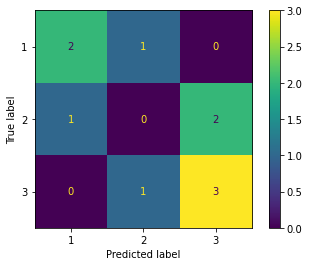

In [4]:
ConfusionMatrixDisplay.from_predictions(A, B)

In [5]:
def extract_array_from_cm(cm, k):
    r1 = []
    r2 = []
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            if i == j:       
                for x in range(cm[i][j]):
                    r1.extend([k[i]])
                    r2.extend([k[j]])
            else:
                for x in range(cm[i][j]):            
                    r1.extend([k[i]])                
                    r2.extend([k[j]])
    return r1, r2

In [6]:
k = [1,2,3]
r1, r2 = extract_array_from_cm(cm, k)

In [7]:
r1

[1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

In [8]:
r2

[1, 1, 2, 1, 3, 3, 2, 3, 3, 3]

In [9]:
confusion_matrix(r1,r2)

array([[2, 1, 0],
       [1, 0, 2],
       [0, 1, 3]], dtype=int64)

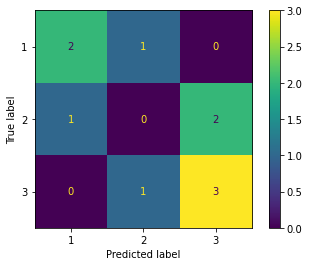

In [10]:
ConfusionMatrixDisplay.from_predictions(r1, r2)

## Create Confusion Matrix

In [11]:
ConfMatrix = np.array([[13,2,1,1,0,1,0],[2,3,1,2,1,0,1],[1,0,1,0,1,0,0],[1,1,0,2,0,1,1],[0,0,2,1,1,1,0],[0,1,0,2,0,1,0],[0,1,0,1,1,0,1]])
ConfMatrix

array([[13,  2,  1,  1,  0,  1,  0],
       [ 2,  3,  1,  2,  1,  0,  1],
       [ 1,  0,  1,  0,  1,  0,  0],
       [ 1,  1,  0,  2,  0,  1,  1],
       [ 0,  0,  2,  1,  1,  1,  0],
       [ 0,  1,  0,  2,  0,  1,  0],
       [ 0,  1,  0,  1,  1,  0,  1]])

In [12]:
k = [1,2,3,4,5,6,7]
r1, r2 = extract_array_from_cm(ConfMatrix, k)

In [13]:
print(r1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]


In [14]:
print(r2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 6, 1, 1, 2, 2, 2, 3, 4, 4, 5, 7, 1, 3, 5, 1, 2, 4, 4, 6, 7, 3, 3, 4, 5, 6, 2, 4, 4, 6, 2, 4, 5, 7]


## Cohen's Kappa

In [15]:
cohen_kappa_score(r1,r2)

0.29894842263395094

## Linear Weighted Kappa

In [16]:
cohen_kappa_score(r1, r2, weights='linear')

0.4043255131964809

## Quadratic Weighted Kappa

In [17]:
cohen_kappa_score(r1, r2, weights='quadratic')

0.5138959584648275

## Prepare array format for Scott's Pi, Bangdiwala's B, and Krippendorff's alpha

In [18]:
r1_ = np.array(r1).reshape(1,-1)
r2_ = np.array(r2).reshape(1,-1)

r = np.concatenate((r1_,r2_), axis=0)
r

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 7, 7, 7, 7],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 6, 1, 1, 2, 2,
        2, 3, 4, 4, 5, 7, 1, 3, 5, 1, 2, 4, 4, 6, 7, 3, 3, 4, 5, 6, 2, 4,
        4, 6, 2, 4, 5, 7]])

## Scott's Pi

In [19]:
scott_pi(np.matrix(ConfMatrix))

0.29718875502008035

## Bangdiwala's B

In [20]:
bangdiwala_b(ConfMatrix)

0.3697813121272366

## Krippendorff's alpha

In [21]:
krippendorff.alpha(r)

0.5187447507062686

In [45]:
def weighted_matrix(N):
    weighted = np.zeros((N,N)) 
    for i in range(len(weighted)):
        for j in range(len(weighted)):
            weighted[i][j] = float(((i-j)**2)/(N-1)**2) 
    return weighted

In [46]:
weighted_matrix(3)

array([[0.  , 0.25, 1.  ],
       [0.25, 0.  , 0.25],
       [1.  , 0.25, 0.  ]])

In [47]:
weighted_matrix(4)

array([[0.        , 0.11111111, 0.44444444, 1.        ],
       [0.11111111, 0.        , 0.11111111, 0.44444444],
       [0.44444444, 0.11111111, 0.        , 0.11111111],
       [1.        , 0.44444444, 0.11111111, 0.        ]])

In [86]:
weighted_matrix(7)

array([[0.        , 0.02777778, 0.11111111, 0.25      , 0.44444444,
        0.69444444, 1.        ],
       [0.02777778, 0.        , 0.02777778, 0.11111111, 0.25      ,
        0.44444444, 0.69444444],
       [0.11111111, 0.02777778, 0.        , 0.02777778, 0.11111111,
        0.25      , 0.44444444],
       [0.25      , 0.11111111, 0.02777778, 0.        , 0.02777778,
        0.11111111, 0.25      ],
       [0.44444444, 0.25      , 0.11111111, 0.02777778, 0.        ,
        0.02777778, 0.11111111],
       [0.69444444, 0.44444444, 0.25      , 0.11111111, 0.02777778,
        0.        , 0.02777778],
       [1.        , 0.69444444, 0.44444444, 0.25      , 0.11111111,
        0.02777778, 0.        ]])